<a href="https://colab.research.google.com/github/NishaMDev/DeepLearning/blob/main/Assignment%231/DL_Assignment_1_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 3 : Showcase gradient descent in python colab from scratch without using any libraries - various versions of it - on linear regression problem**

In [1]:
# Common imports
import sys
import sklearn
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#assert sklearn.__version__ >= "0.20"
#assert sys.version_info >= (3, 5)

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300): 
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# **Linear Regression**
**The Normal Equation**

Formulate a normal equation on below randomly generated linear dataset:

X = 2 * B

y = 5 + 4X + B

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 5 + 4 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


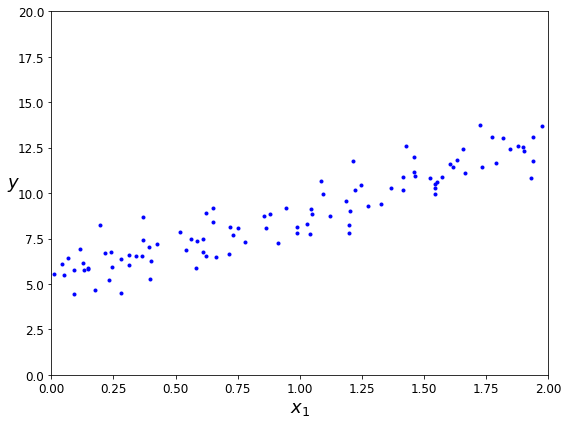

In [21]:
plt.figure(figsize=(8,6))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 20])
save_fig("generated_data_plot")
plt.show()

**Formulate X in vectorized form by adding X0 = 1 in each instance.**

To find the value of θ that minimizes the cost function, there is a closed-form solution—in other words, a mathematical equation that gives the result direct


***Normal Equation:-***

θ = (X.T X)^-1 X.T y

where X.T = X Transpose and ^-1 = raise to -1 

In [5]:
X_vector = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_vector.T.dot(X_vector)).dot(X_vector.T).dot(y)

In [6]:
theta_best

array([[5.21509616],
       [3.77011339]])

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 5.21509616],
       [12.75532293]])

Saving figure linear_model_predictions_plot


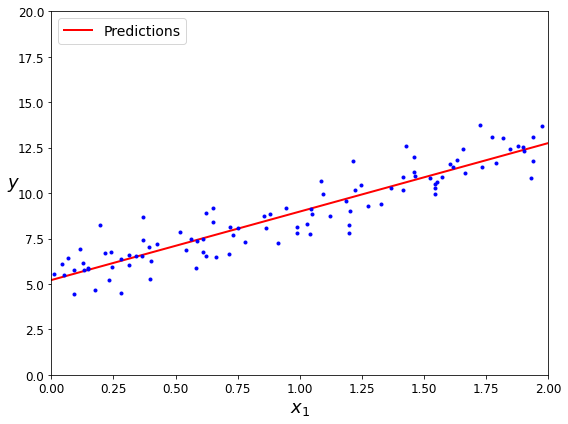

In [22]:
plt.figure(figsize=(8,6))
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 20])
save_fig("linear_model_predictions_plot")
plt.show()

Lets compare the above results with LinearRegression

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([5.21509616]), array([[3.77011339]]))

In [10]:
lin_reg.predict(X_new)

array([[ 5.21509616],
       [12.75532293]])

**We can clearly see that Theta and new prediction from the normal equation is same as the linear regression intercept &  Co-efficient  and new Linear regression prediction.**

The Linear Regression is based on scipy.linal.lstsq() function - "least squares" which can be called directly as shown below

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_vector, y, rcond=1e-6)
theta_best_svd

array([[5.21509616],
       [3.77011339]])

In [13]:
np.linalg.pinv(X_vector).dot(y)

array([[5.21509616],
       [3.77011339]])

# **Gradient Descent**

Showcasing different version of gradient descent in python colab from scratch without using any libraries on linear regression problem.


**A. Batch Gradient Descent**

In [15]:
lr = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_vector.T.dot(X_vector.dot(theta) - y)
    theta = theta - lr * gradients

In [16]:
theta

array([[5.21509616],
       [3.77011339]])

In [17]:
X_new_b.dot(theta)

array([[ 5.21509616],
       [12.75532293]])

In [23]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_vector)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_vector.T.dot(X_vector.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


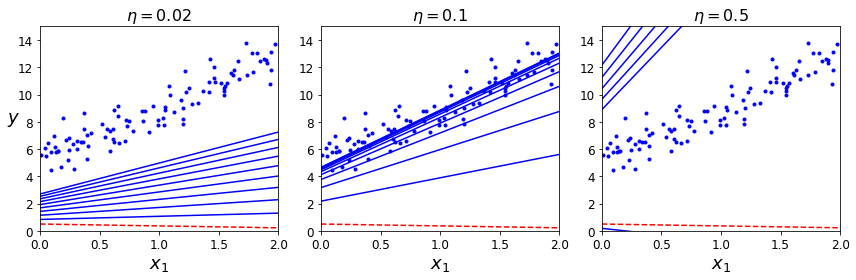

In [27]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(12,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

**B. Stochastic Gradient Descent**

In [28]:
theta_path_sgd = []
m = len(X_vector)
np.random.seed(42)

Saving figure sgd_plot


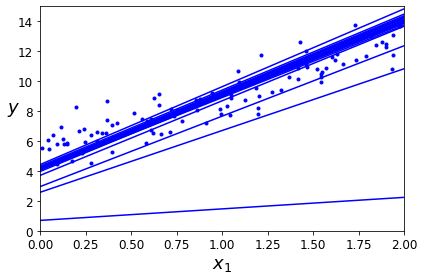

In [36]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"        
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_vector[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        lr = learning_schedule(epoch * m + i)
        theta = theta - lr * gradients
        theta_path_sgd.append(theta)                 


plt.plot(X, y, "b.")                                
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)          
plt.axis([0, 2, 0, 15])                              
save_fig("sgd_plot")                                
plt.show()                                           

In [33]:
theta

array([[5.26995038],
       [3.28879568]])

In [34]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [35]:
sgd_reg.intercept_, sgd_reg.coef_

(array([5.24276987]), array([3.82587262]))

**Mini-batch gradient descent**

In [38]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_vector[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        lr = learning_schedule(t)
        theta = theta - lr * gradients
        theta_path_mgd.append(theta)

In [39]:
theta

array([[5.25214634],
       [3.78964081]])

In [40]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


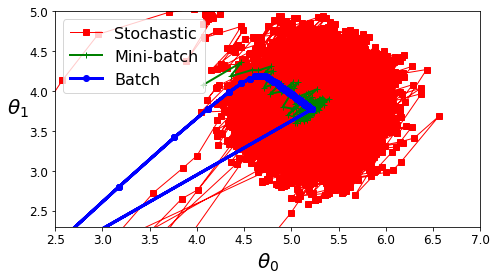

In [49]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 7, 2.3, 5])
save_fig("gradient_descent_paths_plot")
plt.show()